# 1. Import

In [ ]:
import pandas as pd
import numpy as np
import nycflights13 as flights

# 2. Data load

In [2]:
# 항공편 데이터 (main dataset)
df_flights = flights.flights
df_airlines = flights.airlines
df_airports = flights.airports
df_planes = flights.planes
df_weather = flights.weather

# 3. Data Analysis

## 3-1. flights



In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
df_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [5]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


## 3-2. airlines

In [6]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16 non-null     object
 1   name     16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes


## 3-3. airports

In [7]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   faa     1458 non-null   object 
 1   name    1458 non-null   object 
 2   lat     1458 non-null   float64
 3   lon     1458 non-null   float64
 4   alt     1458 non-null   int64  
 5   tz      1458 non-null   int64  
 6   dst     1458 non-null   object 
 7   tzone   1455 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 91.3+ KB


In [8]:
list(df_airports["tzone"].unique())

['America/New_York',
 'America/Chicago',
 'America/Los_Angeles',
 'America/Vancouver',
 'America/Phoenix',
 'America/Anchorage',
 'America/Denver',
 'Pacific/Honolulu',
 'Asia/Chongqing',
 nan]

In [9]:
# 나라별로 공항을 그룹화하여 개수 세기
airport_counts_by_country = df_airports.groupby('tzone').size().reset_index(name='count')

# 결과 내림차순으로 정렬
airport_counts_by_country = airport_counts_by_country.sort_values(by='count', ascending=False)
airport_counts_by_country


,tzone,count
4,America/New_York,519
1,America/Chicago,342
0,America/Anchorage,239
3,America/Los_Angeles,176
2,America/Denver,119
5,America/Phoenix,38
8,Pacific/Honolulu,18
6,America/Vancouver,2
7,Asia/Chongqing,2


In [10]:
# 'JFK', 'LGA', 'EWR'
df_airports[df_airports["faa"].isin(['JFK', 'LGA', 'EWR'])]

,faa,name,lat,lon,alt,tz,dst,tzone
460,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York
691,JFK,John F Kennedy Intl,40.639751,-73.778925,13,-5,A,America/New_York
786,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York


## 3-4. planes

In [11]:
df_planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB


## 3-5. weather

### 데이터 기본 정보 확인

In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26115 entries, 0 to 26114
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26115 non-null  object 
 1   year        26115 non-null  int64  
 2   month       26115 non-null  int64  
 3   day         26115 non-null  int64  
 4   hour        26115 non-null  int64  
 5   temp        26114 non-null  float64
 6   dewp        26114 non-null  float64
 7   humid       26114 non-null  float64
 8   wind_dir    25655 non-null  float64
 9   wind_speed  26111 non-null  float64
 10  wind_gust   5337 non-null   float64
 11  precip      26115 non-null  float64
 12  pressure    23386 non-null  float64
 13  visib       26115 non-null  float64
 14  time_hour   26115 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [13]:
df_weather.shape

(26115, 15)

In [14]:
df_weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [15]:
df_weather.columns

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

'origin' - 기상 관측소 코드

'year' 'month', 'day', 'hour' - 기록 시점

'temp' 기온 (F) - 물이 어는 온도는 32도(섭씨 0도) / 물이 끓는 온도는 212도(섭씨 100도)

'dewp' 이슬점 (F) - 공기 중의 수증기가 포화 상태에 도달하여 이슬이나 안개 형태로 응결되기 시작하는 온도

'humid' 상대습도 - 기온에 따른 습하고 건조한 정도를 백분율로 나타낸 것

'wind_dir' 풍향 - 동풍 90도 / 남풍 180도 / 서풍 270도 / 북향 360도

'wind_speed' 풍속 (mph(mile per hour))

'wind_gust' 돌풍 속도 (mph) - (결측치 많음 20778/26115)

'precip' 강수량 inch (1 inch == 25.4 mm)

'pressure' 해수면 기압 (mb)

'visib' 가시거리 (mile)

'time_hour' POSIXct 형식의 기록 시각

### 결측치 확인

In [16]:
df_weather.isna().sum()

origin            0
year              0
month             0
day               0
hour              0
temp              1
dewp              1
humid             1
wind_dir        460
wind_speed        4
wind_gust     20778
precip            0
pressure       2729
visib             0
time_hour         0
dtype: int64

In [17]:
df_weather[~df_weather["wind_gust"].isna()].head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
14,EWR,2013,1,1,16,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,10.0,2013-01-01T21:00:00Z
16,EWR,2013,1,1,18,33.98,15.08,45.43,310.0,12.65858,25.31716,0.0,1014.1,10.0,2013-01-01T23:00:00Z
19,EWR,2013,1,1,21,30.02,12.92,48.48,320.0,18.41248,26.46794,0.0,1016.0,10.0,2013-01-02T02:00:00Z
20,EWR,2013,1,1,22,28.94,12.02,48.69,320.0,18.41248,25.31716,0.0,1016.5,10.0,2013-01-02T03:00:00Z
22,EWR,2013,1,2,0,26.96,10.94,50.34,310.0,14.96014,25.31716,0.0,1016.3,10.0,2013-01-02T05:00:00Z


In [18]:
df_weather[df_weather["wind_gust"].isna()].tail()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
26104,LGA,2013,12,30,8,44.06,33.98,67.45,260.0,11.50780,NaN,0.0,1012.9,10.0,2013-12-30T13:00:00Z
26105,LGA,2013,12,30,9,44.06,33.08,65.07,260.0,13.80936,NaN,0.0,1013.7,10.0,2013-12-30T14:00:00Z
26106,LGA,2013,12,30,10,42.98,33.80,70.28,330.0,16.11092,NaN,0.0,NaN,10.0,2013-12-30T15:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z
26114,LGA,2013,12,30,18,28.94,10.94,46.41,330.0,18.41248,NaN,0.0,1020.9,10.0,2013-12-30T23:00:00Z


### 고유값 확인

In [19]:
df_weather.shape

(26115, 15)

In [20]:
df_weather.nunique()

origin           3
year             1
month           12
day             31
hour            24
temp           173
dewp           153
humid         2499
wind_dir        37
wind_speed      36
wind_gust       37
precip          59
pressure       468
visib           20
time_hour     8714
dtype: int64

In [21]:
df_weather["time_hour"].unique()

array(['2013-01-01T06:00:00Z', '2013-01-01T07:00:00Z',
       '2013-01-01T08:00:00Z', ..., '2013-12-17T05:00:00Z',
       '2013-01-01T17:00:00Z', '2013-08-22T22:00:00Z'], dtype=object)

### 통계값 확인

In [22]:
df_weather.groupby("origin").mean(numeric_only=True)

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
origin,,,,,,,,,,,,,
EWR,2013.0,6.503505,15.672642,11.488337,55.546553,41.852156,63.062162,195.483604,9.461073,24.135727,0.005042,1017.832801,9.277015
JFK,2013.0,6.503676,15.678612,11.490811,54.472150,41.857119,65.205077,204.183709,11.468396,27.563739,0.003985,1018.180698,9.177578
LGA,2013.0,6.504020,15.674707,11.493223,55.762605,40.610868,59.323183,199.510113,10.622839,25.144656,0.004381,1017.678161,9.311531


In [23]:
grouped_df = df_weather.groupby(["origin","year","month"]).mean(numeric_only=True)
grouped_df

day       hour       temp       dewp      humid  \
origin year month                                                          
EWR    2013 1      16.040431  11.514825  35.562156  22.672507  62.124515   
            2      14.478326  11.496263  34.263318  21.936143  63.335575   
            3      16.008075  11.512786  40.118654  25.032571  57.913822   
            4      15.500000  11.500000  52.977500  34.574250  54.235125   
            5      16.000000  11.500000  63.320242  49.237419  64.073710   
            6      15.500000  11.500000  73.267250  60.398750  67.002292   
            7      16.017544  11.522267  80.702996  67.525830  66.676410   
            8      15.971622  11.459459  74.537483  61.156590  65.751746   
            9      15.518776  11.493741  67.304784  53.592990  64.035563   
            10     15.904891  11.461957  59.778207  47.017038  65.319280   
            11     15.591608  11.447552  44.577343  28.788448  56.520112   
            12     15.396359  11.449580  37.950084  28.198571  69.721415   
JFK    2013 1      16.040431  11.514825  35.385553  22.332884  61.661617   
            2      14.490313  11.517139  34.192459  21.570462  62.558480   
            3      16.022911  11.526954  39.544717  24.620970  58.022224   
            4      15.518776  11.488178  50.142698  34.705508  60.057636   
            5      16.000000  11.500000  59.314758  48.650726  70.989261   
            6      15.500000  11.500000  69.958250  60.286750  73.761472   
            7      16.000000  11.500000  78.734919  67.903468  71.744691   
            8      15.975610  11.490515  73.818780  61.526098  67.844201   
            9      15.500000  11.500000  66.897750  53.673000  65.251819   
            10     15.924119  11.448509  59.801951  47.023171  65.063618   
            11     15.632539  11.469846  45.134194  29.447938  56.799607   
            12     15.398601  11.433566  38.604867  28.347133  68.313413   
LGA    2013 1      16.033693  11.522911  35.959272  22.037655  59.156092   
            2      14.479104  11.502985  34.356119  21.155403  60.686030   
            3      16.022911  11.526954  39.976523  24.694474  56.559474   
            4      15.500000  11.500000  52.114500  33.597750  53.150597   
            5      16.000000  11.500000  62.750000  47.610403  61.496183   
            6      15.500000  11.500000  73.326500  57.939750  61.226861   
            7      15.979812  11.512786  80.764253  65.587806  62.264038   
            8      15.983762  11.499323  75.048254  59.397267  60.345737   
            9      15.500000  11.500000  67.911250  52.463000  59.677431   
            10     15.924119  11.448509  60.632439  45.826585  60.138753   
            11     15.632539  11.469846  45.260926  28.233128  53.492959   
            12     15.398601  11.433566  38.769762  26.615105  63.627692   

                     wind_dir  wind_speed  wind_gust    precip     pressure  \
origin year month                                                             
EWR    2013 1      217.675378    9.874685  27.321978  0.004757  1020.977557   
            2      206.396947   12.202740  26.227938  0.005725  1016.240102   
            3      236.331034   11.613262  24.827094  0.004038  1013.533481   
            4      170.686695    9.628193  23.468091  0.002042  1020.506240   
            5      180.098039    8.488549  23.742829  0.007312  1018.396880   
            6      193.304598    9.551474  22.339851  0.012125  1013.570947   
            7      194.439776    9.148779  21.168017  0.005047  1016.555728   
            8      196.557610    7.623140  21.171579  0.006176  1016.641496   
            9      191.979914    8.029852  21.764266  0.002142  1016.996280   
            10     150.378151    8.324392  22.434833  0.000679  1018.108072   
            11     209.455587   10.348973  26.641176  0.004168  1022.539024   
            12     198.070922    8.932245  23.570193  0.006373  1019.880363   
JFK    2013 1      235.829960 

In [24]:
##################################################

In [25]:
df_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [26]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [27]:
def get_hour(dep_time):
    if pd.isna(dep_time):
        return None
    hour = int(dep_time) // 100
    return hour

df_flights['dep_hour'] = df_flights['dep_time'].apply(get_hour)

In [28]:
hourly_counts = df_flights.groupby(['origin', 'dep_hour']).size().reset_index(name='flight_count')

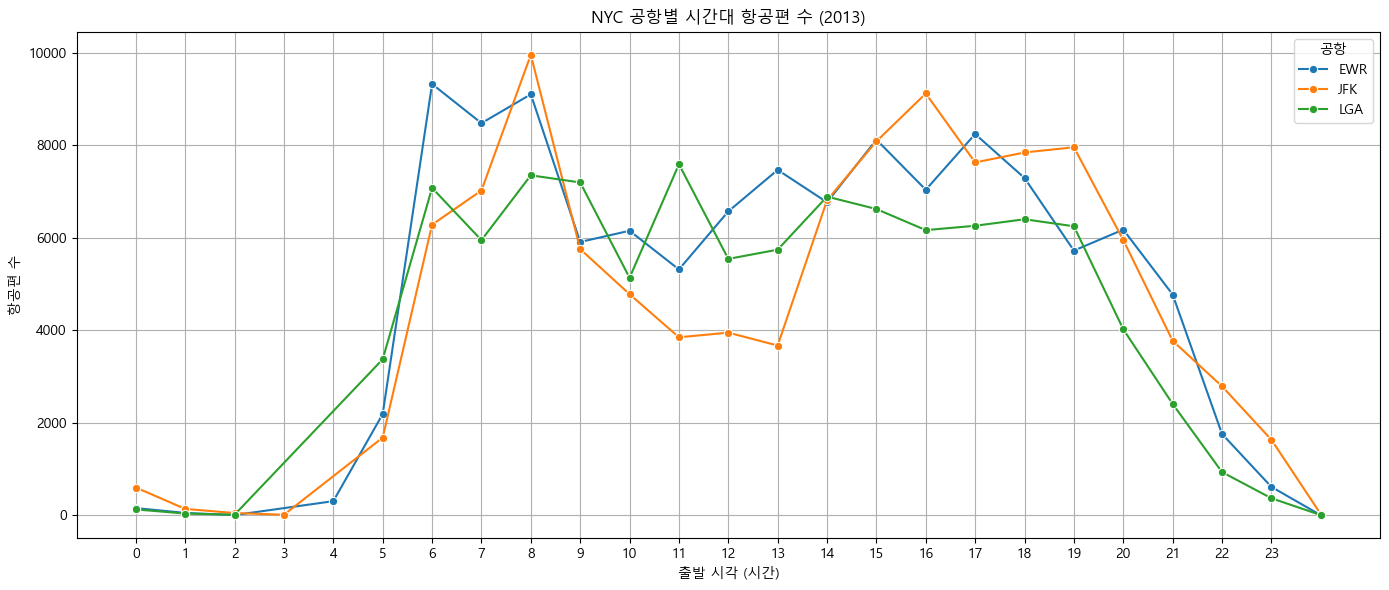

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (예: Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14,6))
sns.lineplot(data=hourly_counts, x='dep_hour', y='flight_count', hue='origin', marker='o')

plt.title("NYC 공항별 시간대 항공편 수 (2013)")
plt.xlabel("출발 시각 (시간)")
plt.ylabel("항공편 수")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="공항")
plt.tight_layout()
plt.show()


In [30]:
df_flights.groupby("carrier").count().sort_values(by="year", ascending=False)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_hour
carrier,,,,,,,,,,,,,,,,,,,
UA,58665,58665,58665,57979,58665,57979,57916,58665,57782,58665,57979,58665,58665,57782,58665,58665,58665,58665,57979
B6,54635,54635,54635,54169,54635,54169,54137,54635,54049,54635,54635,54635,54635,54049,54635,54635,54635,54635,54169
EV,54173,54173,54173,51356,54173,51356,51251,54173,51108,54173,54173,54173,54173,51108,54173,54173,54173,54173,51356
DL,48110,48110,48110,47761,48110,47761,47746,48110,47658,48110,48110,48110,48110,47658,48110,48110,48110,48110,47761
AA,32729,32729,32729,32093,32729,32093,32059,32729,31947,32729,32645,32729,32729,31947,32729,32729,32729,32729,32093
MQ,26397,26397,26397,25163,26397,25163,25076,26397,25037,26397,26395,26397,26397,25037,26397,26397,26397,26397,25163
US,20536,20536,20536,19873,20536,19873,19842,20536,19831,20536,19873,20536,20536,19831,20536,20536,20536,20536,19873
9E,18460,18460,18460,17416,18460,17416,17345,18460,17294,18460,17416,18460,18460,17294,18460,18460,18460,18460,17416
WN,12275,12275,12275,12083,12275,12083,12075,12275,12044,12275,12245,12275,12275,12044,12275,12275,12275,12275,12083


In [31]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,5.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,5.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,5.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,5.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,5.0


In [32]:
# 예제 데이터 프레임 생성
merged_df = pd.merge(df_flights, df_planes, on='tailnum', how='inner')
merged_df.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,time_hour,dep_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,2013-01-01T10:00:00Z,5.0,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,2013-01-01T10:00:00Z,5.0,1998.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,2013-01-01T10:00:00Z,5.0,1990.0,Fixed wing multi engine,BOEING,757-223,2,178,NaN,Turbo-fan
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,2013-01-01T10:00:00Z,5.0,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,2013-01-01T11:00:00Z,5.0,1991.0,Fixed wing multi engine,BOEING,757-232,2,178,NaN,Turbo-fan


In [33]:
new_df = merged_df.loc[merged_df["carrier"] == "B6",["tailnum", "model"]]
new_df["tailnum"].unique()
new_df["model"].value_counts()

model
A320-232           34063
ERJ 190-100 IGW    18860
SR22                 291
R66                  286
ZODIAC 601HDS        252
A321-231              53
Name: count, dtype: int64

In [34]:
new_df = merged_df.loc[merged_df["carrier"] == "B6",["tailnum", "model"]]

In [35]:
new_df = merged_df.loc[merged_df["carrier"] == "UA",["tailnum", "model"]]
new_df["model"].unique()
new_df["model"].value_counts()

model
737-824      13809
A320-232      9641
757-222       9150
A319-131      6546
737-924ER     6532
737-724       5235
757-224       3687
737-924       1026
767-424ER      532
757-324        360
767-322        290
757-33N        133
767-224         13
787-8            6
737-524          4
777-224          4
777-222          4
Name: count, dtype: int64

In [36]:
new_df = merged_df.loc[merged_df["carrier"] == "UA",["tailnum", "model"]]
new_df["model"].unique()
new_df["model"].value_counts()

model
737-824      13809
A320-232      9641
757-222       9150
A319-131      6546
737-924ER     6532
737-724       5235
757-224       3687
737-924       1026
767-424ER      532
757-324        360
767-322        290
757-33N        133
767-224         13
787-8            6
737-524          4
777-224          4
777-222          4
Name: count, dtype: int64

In [37]:
# 회사마다 비행기 갯수 구하기

df_planes.groupby('model')['tailnum'].nunique().reset_index(name='plane_count')


B6 = merged_df.loc[merged_df["carrier"] == "B6",["tailnum", "model"]]
B6.groupby('model')['tailnum'].nunique().reset_index(name='plane_count').sum(numeric_only=True)

plane_count    190
dtype: int64

In [38]:
UA = merged_df.loc[merged_df["carrier"] == "UA",["tailnum", "model"]]
UA.groupby('model')['tailnum'].nunique().reset_index(name='plane_count').sum(numeric_only=True)

plane_count    598
dtype: int64

In [39]:
new_df = merged_df.loc[(merged_df["carrier"] == "B6")& (merged_df["origin"] == "JFK")]
new_df

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,time_hour,dep_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,2013-01-01T10:00:00Z,5.0,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,2013-01-01T11:00:00Z,5.0,2004.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
9,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,...,2013-01-01T11:00:00Z,5.0,2011.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
10,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,...,2013-01-01T11:00:00Z,5.0,2007.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
13,2013,1,1,559.0,559,0.0,702.0,706,-4.0,B6,...,2013-01-01T10:00:00Z,5.0,2008.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284164,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,2013-10-01T02:00:00Z,22.0,2013.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284165,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,2013-10-01T02:00:00Z,22.0,2007.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284166,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,2013-10-01T02:00:00Z,22.0,2011.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284167,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,2013-10-01T02:00:00Z,23.0,2003.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan


In [40]:
new_df["model"].sum()

'A320-232A320-232A320-232A320-232A320-232A320-232A320-232A320-232A320-232A320-232ERJ 190-100 IGWA320-232A320-232A320-232A320-232ERJ 190-100 IGWA320-232A320-232A320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWERJ 190-100 IGWERJ 190-100 IGWERJ 190-100 IGWERJ 190-100 IGWA320-232ERJ 190-100 IGWERJ 190-100 IGWA320-232A320-232A320-232A320-232A320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232A320-232A320-232ERJ 190-100 IGWERJ 190-100 IGWERJ 190-100 IGWA320-232A320-232ERJ 190-100 IGWERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232A320-232ERJ 190-100 IGWERJ 190-100 IGWERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232A320-232A320-232A320-232ERJ 190-100 IGWERJ 190-100 IGWA320-232A320-232A320-232A320-232A320-232ERJ 190-100 IGWERJ 190-100 IGWA320-232A320-232ERJ 190-100 IGWA320-232ERJ 190-100 IGWERJ 190-100 IGWA320-232ERJ 190-100 IGWA320-232A320-232ERJ 190-100 IGWA320-232A320-232A320-232A320-232A320-232A320-232A320-232ERJ 190-100 IGWA3

In [41]:
new_df = merged_df.loc[(merged_df["carrier"] == "B6")& (merged_df["origin"] == "JFK")]
new_df

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,time_hour,dep_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,2013-01-01T10:00:00Z,5.0,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,2013-01-01T11:00:00Z,5.0,2004.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
9,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,...,2013-01-01T11:00:00Z,5.0,2011.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
10,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,...,2013-01-01T11:00:00Z,5.0,2007.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
13,2013,1,1,559.0,559,0.0,702.0,706,-4.0,B6,...,2013-01-01T10:00:00Z,5.0,2008.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284164,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,2013-10-01T02:00:00Z,22.0,2013.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284165,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,2013-10-01T02:00:00Z,22.0,2007.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284166,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,2013-10-01T02:00:00Z,22.0,2011.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NaN,Turbo-fan
284167,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,2013-10-01T02:00:00Z,23.0,2003.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,NaN,Turbo-fan


# 4. 매각 전략 수립

## 4-1. 데이터 로드 및 전처리

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 결합
df = df_flights.merge(df_airlines, on='carrier', how='left')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,5.0,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,5.0,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,5.0,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,5.0,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,5.0,Delta Air Lines Inc.


## 4-2. 항공편 분석

In [43]:
jetblue = df[df['carrier'] == 'B6']
delta = df[df['carrier'] == 'DL']
american = df[df['carrier'] == 'AA']
united = df[df['carrier'] == 'UA']

# 1) 총 운항 편수
jetblue_flights = len(jetblue)
delta_flights = len(delta)
american_flights = len(american)
united_flights = len(united)

# 2) 평균 지연 시간
avg_dep_delay_jetblue = jetblue['dep_delay'].mean()
avg_arr_delay_jetblue = jetblue['arr_delay'].mean()

avg_dep_delay_delta = delta['dep_delay'].mean()
avg_arr_delay_delta = delta['arr_delay'].mean()

avg_dep_delay_american = american['dep_delay'].mean()
avg_arr_delay_american = american['arr_delay'].mean()

avg_dep_delay_united = united['dep_delay'].mean()
avg_arr_delay_united = united['arr_delay'].mean()

# 3) 정시 도착율 (지연 <= 15분)
ontime_arrival_rate_jetblue = (jetblue['arr_delay'] <= 15).mean()
ontime_arrival_rate_delta = (delta['arr_delay'] <= 15).mean()
ontime_arrival_rate_american = (american['arr_delay'] <= 15).mean()
ontime_arrival_rate_united = (united['arr_delay'] <= 15).mean()

# 4) 주요 목적지 Top 10
top_dest_jetblue = jetblue['dest'].value_counts().head(10)
top_dest_delta = delta['dest'].value_counts().head(10)
top_dest_american = american['dest'].value_counts().head(10)
top_dest_united = united['dest'].value_counts().head(10)

## 4-3. JetBlue vs Delta, American, United 비교

In [44]:
# 정시율 비교 함수
def get_on_time_stats(df, name):
    return {
        'name': name,
        'on_time_arrival': (df['arr_delay'] <= 15).mean(),
        'avg_dep_delay': df['dep_delay'].mean(),
        'avg_arr_delay': df['arr_delay'].mean(),
        'total_flights': len(df)
    }

stats = pd.DataFrame([
    get_on_time_stats(jetblue, 'JetBlue'),
    get_on_time_stats(delta, 'Delta'),
    get_on_time_stats(american, 'American'),
    get_on_time_stats(united, 'United')
])

print(stats)


       name  on_time_arrival  avg_dep_delay  avg_arr_delay  total_flights
0   JetBlue         0.730997      13.022522       9.457973          54635
1     Delta         0.809977       9.264505       1.644341          48110
2  American         0.792661       8.586016       0.364291          32729
3    United         0.770306      12.106073       3.558011          58665


## 4-4. 시각화

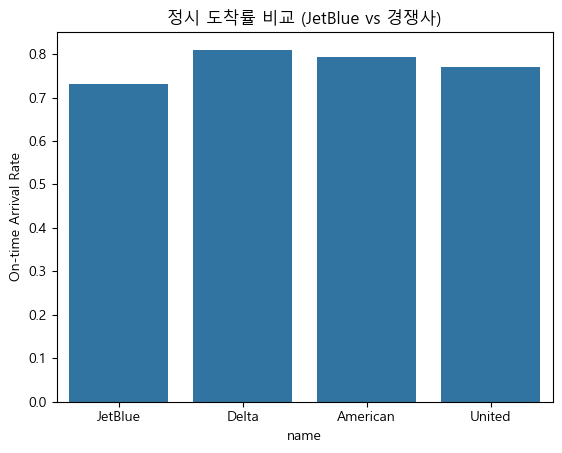

In [45]:
sns.barplot(data=stats, x='name', y='on_time_arrival')
plt.title('정시 도착률 비교 (JetBlue vs 경쟁사)')
plt.ylabel('On-time Arrival Rate')
plt.show()

## 4-5. 공항 집중도 분석 (예: JFK 비중)

In [46]:
jfk_share1 = jetblue['origin'].value_counts(normalize=True)['JFK']
print(f"JetBlue 운항 중 JFK 비중: {jfk_share1:.2%}")
jfk_share2 = delta['origin'].value_counts(normalize=True)['JFK']
print(f"Delta 운항 중 JFK 비중: {jfk_share2:.2%}")
jfk_share3 = american['origin'].value_counts(normalize=True)['JFK']
print(f"American 운항 중 JFK 비중: {jfk_share3:.2%}")
jfk_share4 = united['origin'].value_counts(normalize=True)['JFK']
print(f"United 운항 중 JFK 비중: {jfk_share4:.2%}")

JetBlue 운항 중 JFK 비중: 77.01%
Delta 운항 중 JFK 비중: 43.03%
American 운항 중 JFK 비중: 42.11%
United 운항 중 JFK 비중: 7.73%


In [47]:
jetblue['origin'].value_counts(normalize=True)

origin
JFK    0.770129
EWR    0.120015
LGA    0.109856
Name: proportion, dtype: float64

In [48]:
delta['origin'].value_counts(normalize=True)

origin
LGA    0.479464
JFK    0.430285
EWR    0.090252
Name: proportion, dtype: float64

In [49]:
american['origin'].value_counts(normalize=True)

origin
LGA    0.472333
JFK    0.421125
EWR    0.106542
Name: proportion, dtype: float64

In [50]:
united['origin'].value_counts(normalize=True)  ### united 항공이 jfk공항의 점유율이 낮은듯

origin
EWR    0.785596
LGA    0.137118
JFK    0.077286
Name: proportion, dtype: float64

## 4-6. 요약 논리 정리

In [51]:
print(f"""
[JetBlue 분석 요약]
- 총 운항 편수: {jetblue_flights}
- 평균 출발 지연: {avg_dep_delay_jetblue:.2f}분
- 평균 도착 지연: {avg_arr_delay_jetblue:.2f}분
- 정시 도착율: {ontime_arrival_rate_jetblue:.2%}
- 주요 허브: JFK (비중 {jfk_share1:.2%})
- 인기 목적지 Top 5:
{top_dest_jetblue[:5]}
""")


[JetBlue 분석 요약]
- 총 운항 편수: 54635
- 평균 출발 지연: 13.02분
- 평균 도착 지연: 9.46분
- 정시 도착율: 73.10%
- 주요 허브: JFK (비중 77.01%)
- 인기 목적지 Top 5:
dest
FLL    6563
MCO    6472
BOS    4383
PBI    3161
BUF    2803
Name: count, dtype: int64



In [52]:
print(f"""
[Delta] 분석 요약]
- 총 운항 편수: {delta_flights}
- 평균 출발 지연: {avg_dep_delay_delta:.2f}분
- 평균 도착 지연: {avg_arr_delay_delta:.2f}분
- 정시 도착율: {ontime_arrival_rate_delta:.2%}
- 주요 허브: JFK (비중 {jfk_share2:.2%})
- 인기 목적지 Top 5:
{top_dest_delta[:5]}
""")


[Delta] 분석 요약]
- 총 운항 편수: 48110
- 평균 출발 지연: 9.26분
- 평균 도착 지연: 1.64분
- 정시 도착율: 81.00%
- 주요 허브: JFK (비중 43.03%)
- 인기 목적지 Top 5:
dest
ATL    10571
DTW     3875
MCO     3663
MIA     2929
FLL     2903
Name: count, dtype: int64



In [53]:
print(f"""
[American 분석 요약]
- 총 운항 편수: {american_flights}
- 평균 출발 지연: {avg_dep_delay_american:.2f}분
- 평균 도착 지연: {avg_arr_delay_american:.2f}분
- 정시 도착율: {ontime_arrival_rate_american:.2%}
- 주요 허브: JFK (비중 {jfk_share3:.2%})
- 인기 목적지 Top 5:
{top_dest_american[:5]}
""")


[American 분석 요약]
- 총 운항 편수: 32729
- 평균 출발 지연: 8.59분
- 평균 도착 지연: 0.36분
- 정시 도착율: 79.27%
- 주요 허브: JFK (비중 42.11%)
- 인기 목적지 Top 5:
dest
DFW    7257
MIA    7234
ORD    6059
LAX    3582
BOS    1455
Name: count, dtype: int64



In [54]:
print(f"""
[United 분석 요약]
- 총 운항 편수: {united_flights}
- 평균 출발 지연: {avg_dep_delay_united:.2f}분
- 평균 도착 지연: {avg_arr_delay_united:.2f}분
- 정시 도착율: {ontime_arrival_rate_united:.2%}
- 주요 허브: JFK (비중 {jfk_share4:.2%})
- 인기 목적지 Top 5:
{top_dest_united[:5]}
""")


[United 분석 요약]
- 총 운항 편수: 58665
- 평균 출발 지연: 12.11분
- 평균 도착 지연: 3.56분
- 정시 도착율: 77.03%
- 주요 허브: JFK (비중 7.73%)
- 인기 목적지 Top 5:
dest
ORD    6984
IAH    6924
SFO    6819
LAX    5823
DEN    3796
Name: count, dtype: int64

